In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar y limpiar datos

df = pd.read_csv('../data/sleep_predictor_dataset.csv')
df

# Separar características y objetivo
X = df.drop(columns=["Sleep_disorder", "Diagnosis_Confirmed"])
y = df["Sleep_disorder"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Diccionario de recomendaciones
recomendaciones = {
    0: ["No se detectan trastornos del sueño. Mantén tus hábitos actuales."],
    1: [
        "Establece un horario de sueño regular.",
        "Evita pantallas 1 hora antes de dormir.",
        "Practica técnicas de relajación como meditación."
    ],
    2: [
        "Consulta con un neurólogo.",
        "Evita manejar si tienes somnolencia.",
        "Haz siestas programadas si es posible."
    ],
    3: [
        "Perder peso si tienes sobrepeso.",
        "Evita alcohol y sedantes antes de dormir.",
        "Intenta dormir de lado, no boca arriba."
    ],
    4: [
        "Evita cafeína por la tarde.",
        "Crea una rutina de sueño relajante.",
        "Evita situaciones de estrés nocturno."
    ],
    5: [
        "Consulta por niveles bajos de hierro.",
        "Haz estiramientos o masajes en las piernas.",
        "Mantén un ambiente fresco y cómodo para dormir."
    ]
}

# Función de recomendación
def recomendar(input_dict):
    input_df = pd.DataFrame([input_dict])
    pred = model.predict(input_df)[0]
    return {
        "Trastorno_predicho": int(pred),
        "Recomendaciones": recomendaciones.get(int(pred), ["Consulta con un especialista del sueño."])
    }

# -----------------------
# 🧪 EJEMPLO DE USO
# -----------------------
input_usuario = {
    "Gender": 1,
    "Age": 30,
    "Occupation": 3,
    "Sleep Duration": 5.5,
    "Quality of Sleep": 3,
    "Physical Activity Level": 20,
    "Stress Level": 8,
    "BMI Category": 3,
    "Blood Pressure": 12,
    "Heart Rate": 85,
    "Daily Steps": 3000
}

resultado = recomendar(input_usuario)
print("Trastorno predicho:", resultado["Trastorno_predicho"])
print("Recomendaciones:")
for r in resultado["Recomendaciones"]:
    print("-", r)


Trastorno predicho: 5
Recomendaciones:
- Consulta por niveles bajos de hierro.
- Haz estiramientos o masajes en las piernas.
- Mantén un ambiente fresco y cómodo para dormir.


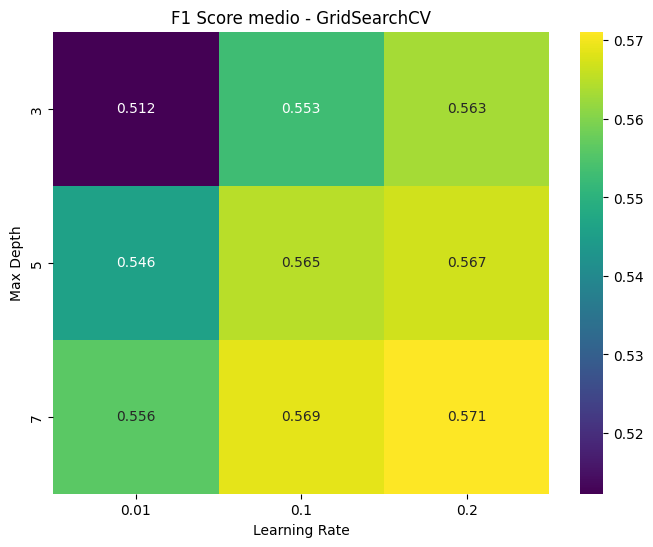

In [ ]:

# Convertir resultados del grid a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Pivot para heatmap
pivot = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_learning_rate'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("F1 Score medio - GridSearchCV")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.show()
